In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# from matplotlib import style
import seaborn as sns
%matplotlib inline
from env import get_connection

# pd.plotting.register_matplotlib_converters()

In [2]:
# Constant (to generate filename for csv)
filename = 'curriculum_logs_data.csv'
# Acquire data.
# ----------------------ACQUIRE FUNCTION---------------------------------
def acquire_curlogs():
    '''
    function created to search/retrieve curriculum_logs for codeup exercise
    '''
    if os.path.isfile(filename):
        # If the CSV file exists, read it directly
        return pd.read_csv(filename)
    else:
        query = '''
                SELECT date, path AS endpoint, user_id, cohort_id, ip AS source_ip, name, program_id
                FROM cohorts
                LEFT JOIN logs ON cohorts.id = logs.user_id;
                '''
        url = get_connection('curriculum_logs')
        df = pd.read_sql(query, url)
        df.to_csv(filename, index=False)
        return df

In [3]:
df = acquire_curlogs()

In [4]:
df.head(20)

,date,endpoint,user_id,cohort_id,source_ip,name,program_id
0,2018-02-01,spring/fundamentals/form-model-binding,1,8.0,97.105.19.61,Arches,1
1,2018-02-01,javascript-ii/es6,1,8.0,97.105.19.61,Arches,1
2,2018-02-01,javascript-ii,1,8.0,97.105.19.61,Arches,1
3,2018-02-01,/,1,8.0,97.105.19.61,Arches,1
4,2018-01-31,javascript-i/arrays,1,8.0,97.105.19.61,Arches,1
5,2018-01-31,javascript-i/functions,1,8.0,97.105.19.61,Arches,1
6,2018-01-31,git/working-in-teams,1,8.0,97.105.19.61,Arches,1
7,2018-01-31,git/branching,1,8.0,97.105.19.61,Arches,1
8,2018-01-31,git/cli,1,8.0,97.105.19.61,Arches,1
9,2018-01-31,appendix,1,8.0,97.105.19.61,Arches,1


In [5]:
df = df[df['endpoint'] != '/']

In [6]:
df = df.dropna()

In [7]:
webdev = df[df['endpoint'].str.contains('javascript|html|css', case=False)]

In [8]:
df2 = df[~df['endpoint'].str.contains('javascript|html|css', case=False, na=False, regex=True)]

In [9]:
datascience = df[~df['endpoint'].str.contains('javascript|html|css|spring|java|bootstrap|web-design|jquery|mkdocs/search_index.json|spring|flask|virtual-enviornments|ajax|php|slides/sessions_and_cookies|slides/console_io|slides', case=False, na=False, regex=True)]

In [10]:
datascience.endpoint.value_counts()

endpoint
appendix                    987
mysql                       898
classification/overview     585
search/search_index.json    576
sql/mysql-overview          555
                           ... 
6.00_Intro.md                 1
6._Classification.md          1
cli-01-intro                  1
cli-00-overview               1
interview                     1
Name: count, Length: 996, dtype: int64

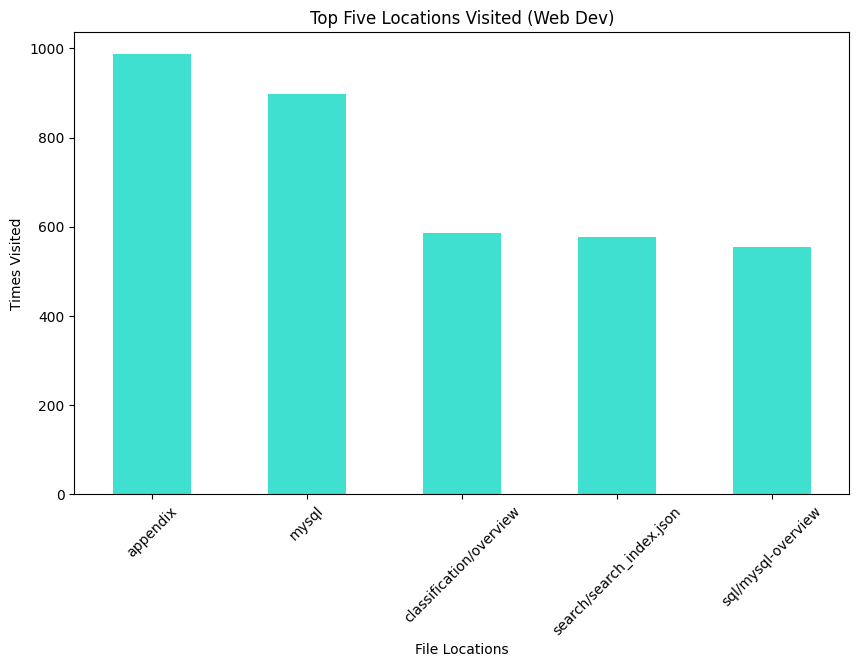

In [11]:
top_five_endpoints = datascience['endpoint'].value_counts().head(5)
top_five_endpoints.plot(kind='bar', figsize=(10, 6), color='turquoise')
plt.title('Top Five Locations Visited (Web Dev)')
plt.xlabel('File Locations')
plt.ylabel('Times Visited')
plt.xticks(rotation=45)
plt.show()

# 3

Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

,user_id,endpoint
12,13,92
23,24,24
37,55,88


In [13]:
# Group data by 'user_id' and count interactions
user_activity = df.groupby('user_id')['endpoint'].count().reset_index()

In [14]:
# Define a threshold for inactive users (e.g., less than 5 interactions)
threshold = 100

In [15]:
# Identify inactive users
user_activity[user_activity['endpoint'] < threshold]

,user_id,endpoint
12,13,92
23,24,24
37,55,88


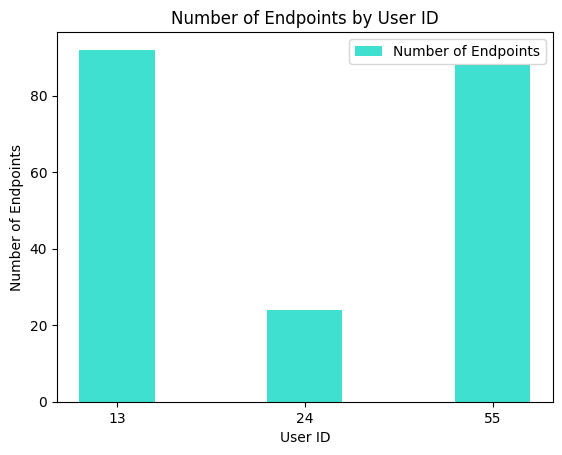

In [16]:
import matplotlib.pyplot as plt

# Example data
user_ids = [13, 24, 55]
num_endpoints = [92, 24, 88]

# Width of each bar
bar_width = 0.4  # Adjust this value as needed

# Calculate the x positions for the bars
x = range(len(user_ids))

# Create a bar plot with specified width
plt.bar(x, num_endpoints, width=bar_width, align='center', label='Number of Endpoints', color = 'turquoise')

# Set the x-tick positions and labels
plt.xticks(x, user_ids)

# Add labels and a title
plt.xlabel('User ID')
plt.ylabel('Number of Endpoints')
plt.title('Number of Endpoints by User ID')

# Show the plot
plt.legend()
plt.show()

In [17]:
user_ids = [13, 24, 55]

for user_id in user_ids:
    #Filter the data for the current user
    user_data = df[df['user_id'] == user_id]
    
    #Group the data by 'endpoint' and count occurrences
    endpoint_counts = user_data['endpoint'].value_counts()
    
    #Find the endpoint with the highest count
    most_visited_endpoint = endpoint_counts.idxmax()
    count = endpoint_counts.max()
    
    print(f"User {user_id}: Most visited endpoint is '{most_visited_endpoint}' with {count} visits.")

User 13: Most visited endpoint is 'javascript-i/functions' with 12 visits.
User 24: Most visited endpoint is 'mkdocs/search_index.json' with 3 visits.
User 55: Most visited endpoint is 'spring/fundamentals/security/authentication' with 9 visits.


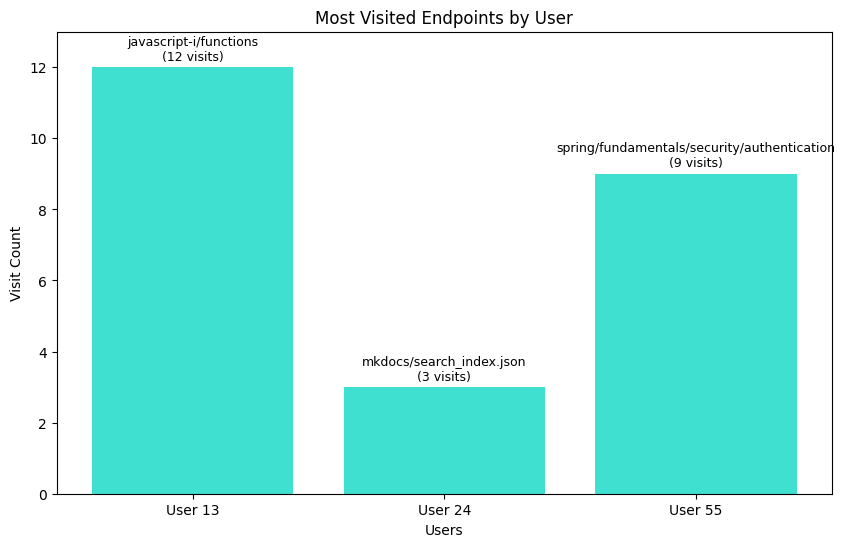

In [18]:
users = ['User 13', 'User 24', 'User 55']
endpoints = ['javascript-i/functions', 'mkdocs/search_index.json', 'spring/fundamentals/security/authentication']
visit_counts = [12, 3, 9]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(users, visit_counts, color='turquoise')
plt.xlabel('Users')
plt.ylabel('Visit Count')
plt.title('Most Visited Endpoints by User')
plt.ylim(0, max(visit_counts) + 1)

for user, endpoint, count in zip(users, endpoints, visit_counts):
    plt.text(user, count + 0.2, f'{endpoint}\n({count} visits)', ha='center', fontsize=9)

plt.show()


# 5

At some point in 2019, the ability for students and alumni to access both curricula (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [ ]:
QUESTION 5

cell 1
df.date = pd.to_datetime(df['date'])
df = df.set_index(df.date)


cell 2
# Filter the DataFrame to select dates within the year 2018
dates_in_2018 = df[(df['date'] >= '2018-01-01') & (df['date'] <= '2018-12-31')]
# Filter the DataFrame to select dates within the year 2019
dates_in_2019 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-12-31')]
# Filter the DataFrame to select dates within the year 2020
dates_in_2020 = df[(df['date'] >= '2020-01-01') & (df['date'] <= '2020-12-31')]


cell 3
# Filter data for 2019
df_2019 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-12-31')]

# Convert 'date' column to datetime
df_2019['date'] = pd.to_datetime(df_2019['date'])

# Set the 'date' column as the index
df_2019.set_index('date', inplace=True)

# Resample the data to daily frequency and count the number of observations per day
daily_counts = df_2019['program_id'].resample('D').count()

# Plot the daily counts
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Daily Observations in 2019')
plt.xlabel('Date')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.show()


cell 4
# Filter data for 2019
df_2018 = df[(df['date'] >= '2018-01-01') & (df['date'] <= '2018-12-31')]

# Convert 'date' column to datetime
df_2018['date'] = pd.to_datetime(df_2018['date'])

# Set the 'date' column as the index
df_2018.set_index('date', inplace=True)

# Resample the data to daily frequency and count the number of observations per day
daily_counts = df_2018['program_id'].resample('D').count()

# Plot the daily counts
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Daily Observations in 2018')
plt.xlabel('Date')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.show()


cell 5 
datascience_df = df[~df['endpoint'].str.contains('javascript|html|css|spring|java|bootstrap|web-design|jquery|mkdocs|search_index.json|spring|flask|virtual-enviornments|ajax|php|slides/sessions_and_cookies|slides/console_io|slides', case=False, na=False, regex=True)]
webdev_df = df[df['endpoint'].str.contains('javascript|css|html|bootstrap|web-design|jquery|mkdocs|search_index.json|spring|flask|virtual-enviornments|ajax|php|slides/sessions_and_cookies|slides/console_io|slides', case=False, na=False, regex=True)]

cell 6
datascience_df['ds_endpoint'] = datascience_df['endpoint'].apply(lambda x: x + ' (ds)')



In [19]:
df = acquire_curlogs()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73739 entries, 0 to 73738
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        73739 non-null  object 
 1   endpoint    73739 non-null  object 
 2   user_id     73739 non-null  int64  
 3   cohort_id   72405 non-null  float64
 4   source_ip   73739 non-null  object 
 5   name        73739 non-null  object 
 6   program_id  73739 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 3.9+ MB


In [21]:
df.date = pd.to_datetime(df['date'])

In [22]:
df = df.set_index(df.date)

In [23]:
# Filter the DataFrame to select dates within the year 2018
dates_in_2018 = df[(df['date'] >= '2018-01-01') & (df['date'] <= '2018-12-31')]

In [24]:
# Filter the DataFrame to select dates within the year 2019
dates_in_2019 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-12-31')]

In [25]:
# Filter the DataFrame to select dates within the year 2020
dates_in_2020 = df[(df['date'] >= '2020-01-01') & (df['date'] <= '2020-12-31')]

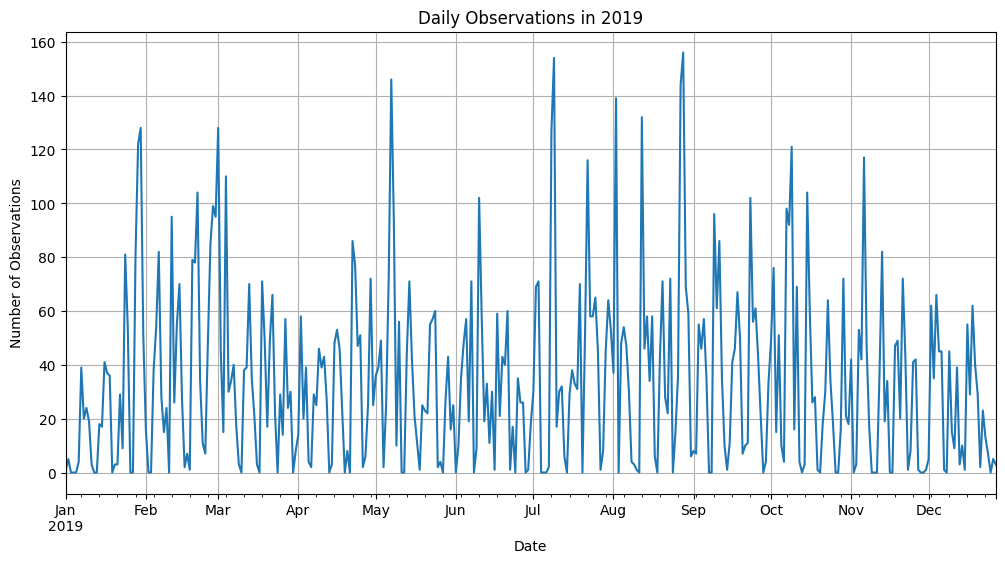

In [26]:
# Filter data for 2019
df_2019 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-12-31')]

# Convert 'date' column to datetime
df_2019['date'] = pd.to_datetime(df_2019['date'])

# Set the 'date' column as the index
df_2019.set_index('date', inplace=True)

# Resample the data to daily frequency and count the number of observations per day
daily_counts = df_2019['program_id'].resample('D').count()

# Plot the daily counts
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Daily Observations in 2019')
plt.xlabel('Date')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.show()


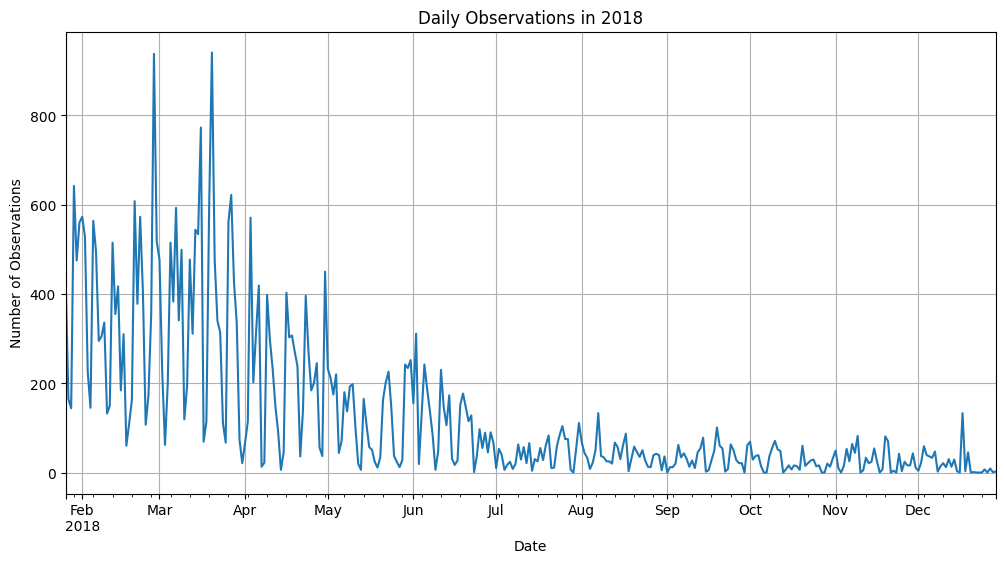

In [27]:
# Filter data for 2019
df_2018 = df[(df['date'] >= '2018-01-01') & (df['date'] <= '2018-12-31')]

# Convert 'date' column to datetime
df_2018['date'] = pd.to_datetime(df_2018['date'])

# Set the 'date' column as the index
df_2018.set_index('date', inplace=True)

# Resample the data to daily frequency and count the number of observations per day
daily_counts = df_2018['program_id'].resample('D').count()

# Plot the daily counts
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Daily Observations in 2018')
plt.xlabel('Date')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.show()

In [28]:
datascience_df = df[~df['endpoint'].str.contains('javascript|html|css|spring|java|bootstrap|web-design|jquery|mkdocs|search_index.json|spring|flask|virtual-enviornments|ajax|php|slides/sessions_and_cookies|slides/console_io|slides', case=False, na=False, regex=True)]

In [29]:
webdev_df = df[df['endpoint'].str.contains('javascript|css|html|bootstrap|web-design|jquery|mkdocs|search_index.json|spring|flask|virtual-enviornments|ajax|php|slides/sessions_and_cookies|slides/console_io|slides', case=False, na=False, regex=True)]

In [30]:
df.date.max()

Timestamp('2021-04-21 00:00:00')

In [31]:
datascience_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29785 entries, 2018-02-01 to 2018-02-01
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        29785 non-null  datetime64[ns]
 1   endpoint    29785 non-null  object        
 2   user_id     29785 non-null  int64         
 3   cohort_id   29467 non-null  float64       
 4   source_ip   29785 non-null  object        
 5   name        29785 non-null  object        
 6   program_id  29785 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 1.8+ MB


In [32]:
webdev_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32601 entries, 2018-02-01 to 2018-02-01
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        32601 non-null  datetime64[ns]
 1   endpoint    32601 non-null  object        
 2   user_id     32601 non-null  int64         
 3   cohort_id   31905 non-null  float64       
 4   source_ip   32601 non-null  object        
 5   name        32601 non-null  object        
 6   program_id  32601 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 2.0+ MB


In [33]:
# Assuming your DataFrame is named 'df'
datascience_df['ds_endpoint'] = datascience_df['endpoint'].apply(lambda x: x + ' (ds)')

In [34]:
# Assuming your DataFrame is named 'df'
webdev_df['wd_endpoint'] = webdev_df['endpoint'].apply(lambda x: x + ' (web)')

In [35]:
datascience_df.date.max()

Timestamp('2021-04-21 00:00:00')

In [36]:
webdev_df.date.max()

Timestamp('2021-04-21 00:00:00')

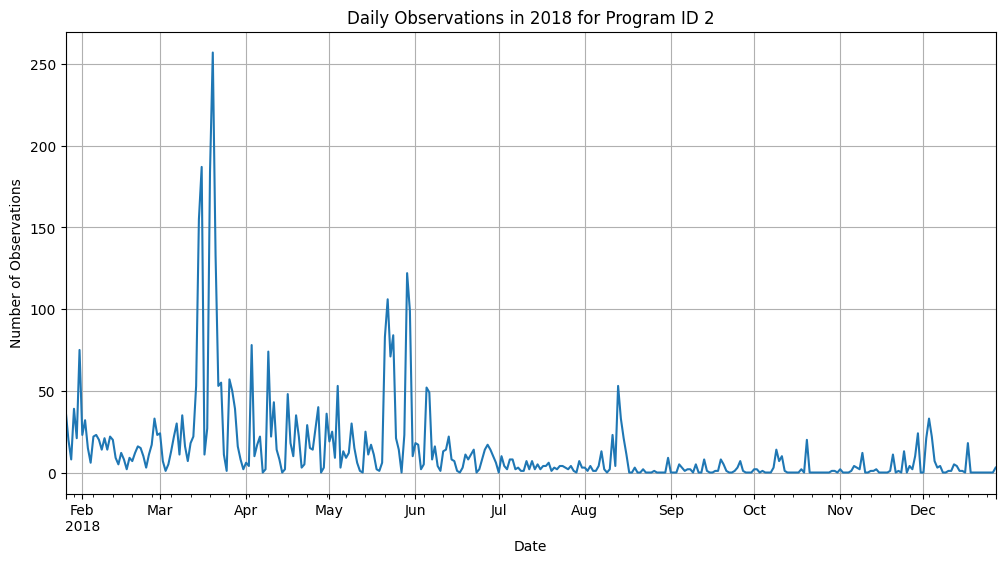

In [37]:
# Filter data for 2018
df_2018 = datascience_df[(datascience_df['date'] >= '2018-01-01') & (datascience_df['date'] <= '2018-12-31')]

# Convert 'date' column to datetime
df_2018['date'] = pd.to_datetime(df_2018['date'])

# Set the 'date' column as the index
df_2018.set_index('date', inplace=True)

# Resample the data to daily frequency and count the number of observations per day
daily_counts = df_2018[df_2018['program_id'] == 2].resample('D').count()

# Plot the daily counts
plt.figure(figsize=(12, 6))
daily_counts['program_id'].plot()
plt.title('Daily Observations in 2018 for Program ID 2')
plt.xlabel('Date')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.show()


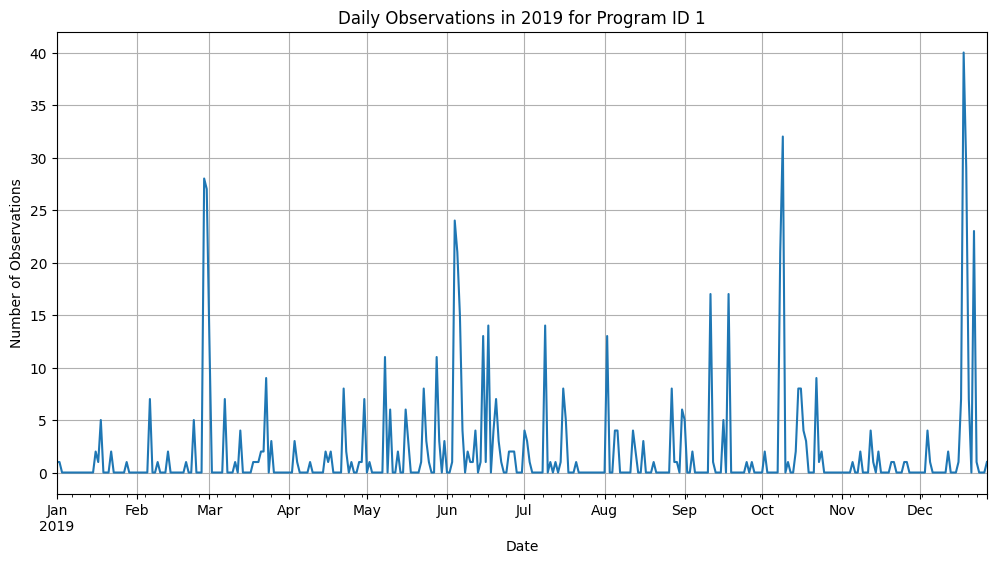

In [38]:
# Filter data for 2019
df_2019 = datascience_df[(datascience_df['date'] >= '2019-01-01') & (datascience_df['date'] <= '2019-12-31')]

# Convert 'date' column to datetime
df_2019['date'] = pd.to_datetime(df_2019['date'])

# Set the 'date' column as the index
df_2019.set_index('date', inplace=True)

# Resample the data to daily frequency and count the number of observations per day
daily_counts = df_2019[df_2019['program_id'] == 2].resample('D').count()

# Plot the daily counts
plt.figure(figsize=(12, 6))
daily_counts['program_id'].plot()
plt.title('Daily Observations in 2019 for Program ID 1')
plt.xlabel('Date')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.show()


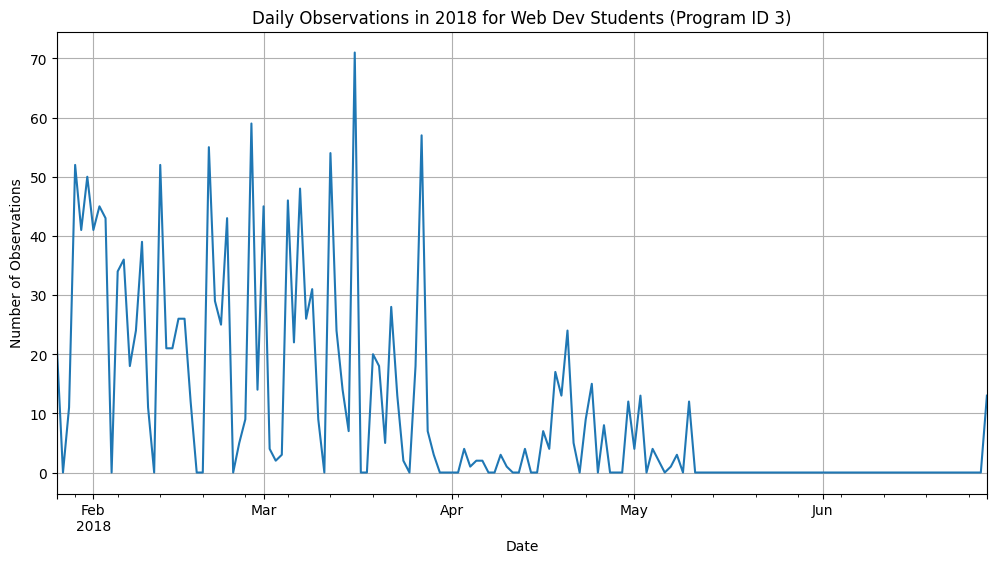

In [39]:
# Filter data for 2018
df_2018 = webdev_df[(webdev_df['date'] >= '2018-01-01') & (webdev_df['date'] <= '2018-12-31')]

# Convert 'date' column to datetime
df_2018['date'] = pd.to_datetime(df_2018['date'])

# Set the 'date' column as the index
df_2018.set_index('date', inplace=True)

# Resample the data to daily frequency and count the number of observations per day
daily_counts = df_2018[df_2018['program_id'] == 3].resample('D').count()

# Plot the daily counts
plt.figure(figsize=(12, 6))
daily_counts['program_id'].plot()
plt.title('Daily Observations in 2018 for Web Dev Students (Program ID 3)')
plt.xlabel('Date')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.show()


In [40]:
df_2019[df_2019['program_id']==3].resample('D').count()

,endpoint,user_id,cohort_id,source_ip,name,program_id,ds_endpoint
date,,,,,,,
